<a href="https://colab.research.google.com/github/Aadityasindhuu/Aadityasindhuu/blob/main/Copy_of_Titanic_Machine_Learning_from_Disaster_Submit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv
Saving test.csv to test.csv


In [ ]:
# Load train and test datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Verify the first few rows of the datasets
print(train_df.head())
print(test_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [ ]:
# Handle missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Drop the 'Cabin' column
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

# Extract titles from the 'Name' column
train_df['Title'] = train_df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
test_df['Title'] = test_df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# Simplify titles by grouping similar titles together
title_mapping = {
    "Mr": "Mr",
    "Miss": "Miss",
    "Mrs": "Mrs",
    "Master": "Master",
    "Dr": "Rare",
    "Rev": "Rare",
    "Col": "Rare",
    "Major": "Rare",
    "Mlle": "Miss",
    "Countess": "Rare",
    "Ms": "Miss",
    "Lady": "Rare",
    "Jonkheer": "Rare",
    "Don": "Rare",
    "Dona": "Rare",
    "Mme": "Mrs",
    "Capt": "Rare",
    "Sir": "Rare"
}

train_df['Title'] = train_df['Title'].map(title_mapping)
test_df['Title'] = test_df['Title'].map(title_mapping)

# Encode categorical variables: 'Sex', 'Embarked', and 'Title'
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# Align test dataset with train dataset columns
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)
test_df.drop(columns=['Survived'], inplace=True)

# Display the first few rows of the processed train and test datasets
print(train_df.head())
print(test_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Sex_male  Embarked_Q  Embarked_S  Title_Miss  \
0         A/5 21171   7.2500      True       False        True       False   
1          PC 17599  71.2833     False       False       False       False   
2  STON/O2. 3101282   7.9250     False       False        True        True   
3            1

In [ ]:
# Split the training data into features and target variable
X_train = train_df.drop(columns=['Survived', 'Name', 'Ticket'])
y_train = train_df['Survived']
X_test = test_df.drop(columns=['Name', 'Ticket'])

In [ ]:
# Train and evaluate multiple models

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Initialize the models
log_reg = LogisticRegression(max_iter=200)
random_forest = RandomForestClassifier(n_estimators=100)
svm = SVC()

# Train and evaluate Logistic Regression
log_reg.fit(X_train_split, y_train_split)
log_reg_pred = log_reg.predict(X_val_split)
log_reg_accuracy = accuracy_score(y_val_split, log_reg_pred)

# Train and evaluate Random Forest
random_forest.fit(X_train_split, y_train_split)
random_forest_pred = random_forest.predict(X_val_split)
random_forest_accuracy = accuracy_score(y_val_split, random_forest_pred)

# Train and evaluate SVM
svm.fit(X_train_split, y_train_split)
svm_pred = svm.predict(X_val_split)
svm_accuracy = accuracy_score(y_val_split, svm_pred)

# Print the accuracy of each model
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")
print(f"Random Forest Accuracy: {random_forest_accuracy}")
print(f"SVM Accuracy: {svm_accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7430167597765364
Random Forest Accuracy: 0.8491620111731844
SVM Accuracy: 0.5977653631284916


                 Model  Accuracy
0  Logistic Regression  0.743017
1        Random Forest  0.849162
2                  SVM  0.597765


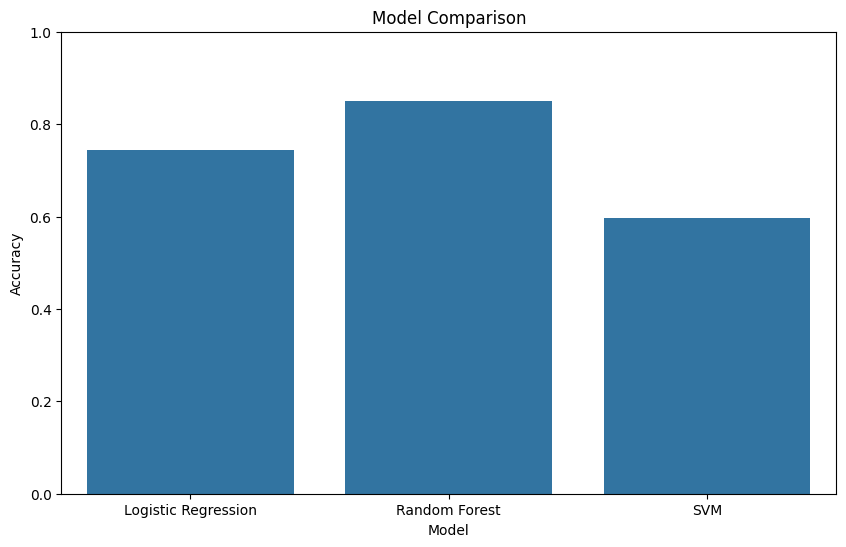

In [ ]:
# Create a DataFrame to compare the results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [log_reg_accuracy, random_forest_accuracy, svm_accuracy]
})

print(results)

# Plot the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results)
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()